# Import libraries

In [41]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import json
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, KFold


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error as mae, r2_score as r2, mean_squared_error as mse, mean_absolute_percentage_error as mape



In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection._split import _validate_shuffle_split
from hyperopt import STATUS_OK, Trials, fmin, hp, space_eval, tpe
from hyperopt.pyll import scope as ho_scope

# Import data

In [43]:
data = pd.read_csv('train_1.csv')
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


#                                                   FIRST APPROACH

# RandomForestRegressor(),XGBRegressor(),KNeighborsRegressor(),LGBMRegressor(),SVR()

In [14]:
def cv_results(data):
    # Step 1: Data Preprocessing
    X = data.drop(columns=['critical_temp'])
    y = data['critical_temp']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale y_train using MinMaxScaler
    scaler = MinMaxScaler()
    y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
    #n_values = [70]  # percentiles
    n_values = [40, 50,60,70,80,90]  # percentiles
    results_X_train = {}  # Dictionary to store mutual results for training data
    results_X_test = {}  # Dictionary to store mutual results for testing data
    
    for n in n_values:
        # Feature Selection using Mutual Information Regression
        sel = SelectPercentile(mutual_info_regression, percentile=n).fit(X_train, y_train)
        X_train_m_n = sel.transform(X_train)
        X_test_m_n = sel.transform(X_test)
       
        # Scaling the feature-selected data using MinMaxScaler
        min_max_scaler = MinMaxScaler()
        X_train_scaled = min_max_scaler.fit_transform(X_train_m_n)
        
        # Storing the scaled data in the dictionary
        results_X_train[f"mut{n}_scaled"] = X_train_scaled
        results_X_test[f"mut{n}"] = X_test_m_n  # No scaling for testing data
        
    # Perform cross-validation for different models and n values
    for n, X_train in results_X_train.items():
        print(f"Cross-validation result for {n}:")
        
        list_of_models = [        
            RandomForestRegressor(),
            XGBRegressor(),
            KNeighborsRegressor(),
            LGBMRegressor(),
            SVR()
            #CatBoostRegressor()
        ]      

        list_of_model_names = [type(x).__name__ for x in list_of_models]
        cv_results = pd.DataFrame(
            data=0.0,
            index=list_of_model_names,
            columns=['fit_time', 'score_time', 'neg_mean_squared_error']
        )
    
        # Training all models from the list
        for model in list_of_models:        
            cv_result = cross_validate(
                estimator=model,
                X=X_train,
                y=y_train_sc,
                scoring=['neg_mean_squared_error'],
                cv=30,
                n_jobs=-1
            )

            cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))
            
            
            print(cv_results)        


    return cv_results, results_X_train, results_X_test


In [15]:
cv_results = cv_results(data)

Cross-validation result for mut40_scaled:
                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  87.276832    0.028668               -0.002671
XGBRegressor            0.000000    0.000000                0.000000
KNeighborsRegressor     0.000000    0.000000                0.000000
LGBMRegressor           0.000000    0.000000                0.000000
SVR                     0.000000    0.000000                0.000000
                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  87.276832    0.028668               -0.002671
XGBRegressor            6.894322    0.003001               -0.003025
KNeighborsRegressor     0.000000    0.000000                0.000000
LGBMRegressor           0.000000    0.000000                0.000000
SVR                     0.000000    0.000000                0.000000
                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  87.276832    0.028668               -0

                         fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  255.743532    0.027734               -0.002654
XGBRegressor             0.000000    0.000000                0.000000
KNeighborsRegressor      0.000000    0.000000                0.000000
LGBMRegressor            0.000000    0.000000                0.000000
SVR                      0.000000    0.000000                0.000000
                         fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  255.743532    0.027734               -0.002654
XGBRegressor            17.738802    0.003339               -0.002870
KNeighborsRegressor      0.000000    0.000000                0.000000
LGBMRegressor            0.000000    0.000000                0.000000
SVR                      0.000000    0.000000                0.000000
                         fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  255.743532    0.027734               -0.002654
XGBRegressor        

In [31]:
#print("Feature-selected training data:")
l = cv_results[1]
#l
X_train_70 = l['mut70_scaled']
X_train_70.shape

(16954, 56)

In [34]:
#print("Feature-selected testing data:")
m =cv_results[2]
#m
X_test_70 = m['mut70']
X_test_70.shape

(4239, 56)

In [35]:
 #Concatenate the arrays along axis 0 (rows)
X_70 = np.concatenate((X_test_70, X_train_70), axis=0)

# Check the shape of the concatenated array
print(X_70.shape)  # Output: (21193, 56)

(21193, 56)


# CatBoostRegressor()

In [9]:
def cv_results(data):
    # Step 1: Data Preprocessing
    X = data.drop(columns=['critical_temp'])
    y = data['critical_temp']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale y_train using MinMaxScaler
    scaler = MinMaxScaler()
    y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
    #n_values = [70]  # percentiles
    n_values = [40, 50,60,70,80,90]  # percentiles
    results_X_train = {}  # Dictionary to store mutual results for training data
    results_X_test = {}  # Dictionary to store mutual results for testing data
    
    for n in n_values:
        # Feature Selection using Mutual Information Regression
        sel = SelectPercentile(mutual_info_regression, percentile=n).fit(X_train, y_train)
        X_train_m_n = sel.transform(X_train)
        X_test_m_n = sel.transform(X_test)
       
        # Scaling the feature-selected data using MinMaxScaler
        min_max_scaler = MinMaxScaler()
        X_train_scaled = min_max_scaler.fit_transform(X_train_m_n)
        
        # Storing the scaled data in the dictionary
        results_X_train[f"mut{n}_scaled"] = X_train_scaled
        results_X_test[f"mut{n}"] = X_test_m_n  # No scaling for testing data
        
    # Perform cross-validation for different models and n values
    for n, X_train in results_X_train.items():
        print(f"Cross-validation result for {n}:")
        
        list_of_models = [CatBoostRegressor()]     
            
           

        list_of_model_names = [type(x).__name__ for x in list_of_models]
        cv_results = pd.DataFrame(
            data=0.0,
            index=list_of_model_names,
            columns=['fit_time', 'score_time', 'neg_mean_squared_error']
        )
    
        # Training all models from the list
        for model in list_of_models:        
            cv_result = cross_validate(
                estimator=model,
                X=X_train,
                y=y_train_sc,
                scoring=['neg_mean_squared_error'],
                cv=30,
                n_jobs=-1
            )

            cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))
            
            
            print(cv_results)        


    return cv_results, results_X_train, results_X_test


In [11]:
cv_result_cat_boost = cv_results(data)

Cross-validation result for mut40_scaled:
                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  33.363574      0.0157                -0.00313
Cross-validation result for mut50_scaled:
                   fit_time  score_time  neg_mean_squared_error
CatBoostRegressor   40.3449    0.016637               -0.003053
Cross-validation result for mut60_scaled:
                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  47.046929    0.020434               -0.002952
Cross-validation result for mut70_scaled:
                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  52.943256    0.027334               -0.002899
Cross-validation result for mut80_scaled:
                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  58.743233    0.026566               -0.002867
Cross-validation result for mut90_scaled:
                   fit_time  score_time  neg_mean_squared_error
CatBoostRegressor   62.5332    0.028

In [13]:
type(cv_result_cat_boost)

tuple

In [41]:
#print("Feature-selected training data:")
l_catboost = cv_result_cat_boost[1]
#l
X_train_70_catboost = l_catboost['mut70_scaled']
X_train_70_catboost.shape

(16954, 56)

In [42]:
#print("Feature-selected testing data:")
m_catboost =cv_result_cat_boost[2]
#m
X_test_70_catboost = m_catboost['mut70']
X_test_70_catboost.shape

(4239, 56)

In [44]:
 #Concatenate the arrays along axis 0 (rows)
X_70_catboost = np.concatenate((X_test_70_catboost, X_train_70_catboost), axis=0)

# Check the shape of the concatenated array
print(X_70_catboost.shape)  # Output: (21193, 56)

(21193, 56)


# Hyperparameters tuning

In [36]:
y = data['critical_temp']

In [37]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [38]:
RandomForest_LABEL = 'RF'
CATBOOST_LABEL = 'CatBoost'
LGBM_LABEL = 'LGBM'
XGB_LABEL = 'XGB'

def unpack_dict(dict_):
    result = dict()
    for k, v in dict_.items():
        if isinstance(v, dict):
            result = {**result, **unpack_dict(v)}
        else:
            result[k] = v
    return result

def round_floats(object_, ndigits=5):
    if isinstance(object_, float):
        return round(object_, ndigits)
    if isinstance(object_, dict):
        return {k: round_floats(v) for k, v in object_.items()}
    if isinstance(object_, (list, tuple)):
        return [round_floats(x) for x in object_]
    return object_

def pretty_print_dict(dict_, sort_keys=True, indent=4, ndigits=None) -> str:
    if ndigits is not None:
        dict_ = round_floats(dict_, ndigits)
    return json.dumps(dict_, sort_keys=sort_keys, indent=indent)

def base_model(model_type, random_state, n_jobs):
    if model_type == CATBOOST_LABEL:
        return CatBoostRegressor(random_state=random_state)
    elif model_type == LGBM_LABEL:
        return LGBMRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == XGB_LABEL:
        return XGBRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == RandomForest_LABEL:
        return RandomForestRegressor(random_state=random_state, n_jobs=n_jobs)
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def shuffle_split(X, test_size, random_state):
    n_train, n_test = _validate_shuffle_split(X.shape[0], test_size=test_size, train_size=None)
    splitter = ShuffleSplit(test_size=n_test, train_size=n_train, random_state=random_state)
    train_index, test_index = next(splitter.split(X=X))
    return train_index, test_index

def search_space(model_type):
    if model_type == LGBM_LABEL:
        return {
            'boosting_type': hp.choice('LGBM_boosting_type', ['gbdt']),
            'max_depth': ho_scope.int(hp.quniform('LGBM_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('LGBM_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('LGBM_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('LGBM_n_estimators', 50, 1000, 10)),
            'max_bin': ho_scope.int(hp.quniform('LGBM_max_bin', 200, 300, 5)),
            'lambda_l1': hp.loguniform('LGBM_lambda_l1', np.log(1e-8), 10.0),
            'lambda_l2': hp.loguniform('LGBM_lambda_l2', np.log(1e-8), 10.0),
            'min_gain_to_split': hp.uniform('LGBM_min_gain_to_split', 0.0, 15.0),
            'bagging_freq': hp.choice('LGBM_bagging_freq', [1]),
            'bagging_fraction': hp.quniform('LGBM_bagging_fraction', 0.5, 0.95, 0.05),
        }
    elif model_type == CATBOOST_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('CatBoost_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('CatBoost_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('CatBoost_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('CatBoost_n_estimators', 50, 1000, 10)),
            'l2_leaf_reg': hp.loguniform('CatBoost_l2_leaf_reg', np.log(1e-8), 10.0),
        }
    elif model_type == XGB_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('XGB_max_depth', 3, 7, 1)),
            'learning_rate': hp.loguniform('XGB_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('XGB_n_estimators', 50, 1000, 10)),
            'reg_alpha': hp.loguniform('XGB_l2_reg_alpha', np.log(1e-8), 10.0),
            'reg_lambda': hp.loguniform('XGB_l2_reg_lambda', np.log(1e-8), 10.0),
        }
    elif model_type == RandomForest_LABEL:
        return {
            'n_estimators': ho_scope.int(hp.quniform('RF_n_estimators', 10, 100, 10)),
            'max_depth': ho_scope.int(hp.quniform('RF_max_depth', 3, 20, 1)),
            'min_samples_split': hp.uniform('RF_min_samples_split', 0.1, 1.0),
            'min_samples_leaf': hp.uniform('RF_min_samples_leaf', 0.1, 0.5),
            'max_features': hp.choice('RF_max_features', ['sqrt', 'log2', None]),
        }
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def evaluate_scores(estimator, X, y, train_index, test_index):
    result = dict()
    prediction = {
        'train': estimator.predict(X[train_index]),
        'test': estimator.predict(X[test_index])
    }

    scoring_functions = {
        'R-squared': r2,
        'MAE': mae,
        'MAPE': mape
    }

    for set_name, y_true in (('train', y[train_index]), ('test', y[test_index])):
        result[set_name] = dict()
        for scoring_label, scoring_function in scoring_functions.items():
            score = scoring_function(y_true, prediction[set_name])
            result[set_name][scoring_label] = score

    return result

In [39]:
class Regressor:
    
    def __init__(
        self,
        n_folds = 5,
        max_iter = 1000,
        n_jobs = 4,
        seed = 1,
        valid_size = 0.2,
        skip = True
    ):
        self.n_folds = n_folds
        self.max_iter = max_iter
        self.n_jobs = n_jobs
        self.seed = seed
        self.valid_size = valid_size
        self.skip = skip

    def _construct_estimator(self, model_type, params_nested):
        model = base_model(model_type, random_state=self.seed, n_jobs=self.n_jobs)
        model.set_params(**unpack_dict(params_nested))
        return model
    
    # Bayesian search of optimal hyperparameters (instead of using GridSearchCV)
    def optimize_hyperparams(
        self, model_type, X, y, train_index, test_index
    ):

        result = dict()

        baseline = self._construct_estimator(model_type, dict()).fit(X[train_index], y[train_index])
        result['baseline_scores'] = evaluate_scores(
            estimator=baseline,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
        result['baseline_estimator'] = baseline
        print(
            f'{model_type}: Baseline classifier`s scores: {pretty_print_dict(result["baseline_scores"], ndigits=5)}'
        )


        def objective(params_nested):
            regressor = self._construct_estimator(model_type, params_nested)
            cv_result = cross_val_score(
                estimator=regressor,
                X=X[train_index],
                y=y[train_index],
                cv=self.n_folds,
                scoring='neg_mean_absolute_percentage_error',
                n_jobs=self.n_jobs,
            )
            return {'loss': -cv_result.mean(), 'cv_std': cv_result.std(), 'params': params_nested, 'status': STATUS_OK}
        if self.skip:
            return result
        print(f'{model_type}: Start hyperparameter optimization ...')
        bayes_trials = Trials()
        best_params = fmin(
            fn=objective,
            space=search_space(model_type),
            algo=tpe.suggest,
            max_evals=self.max_iter,
            trials=bayes_trials,
            rstate=np.random.default_rng(seed=self.seed),
        )
        best_params_nested = space_eval(search_space(model_type), best_params)
        best_params_set = unpack_dict(best_params_nested)
        print(f'{model_type}: Best hyperparams set: {pretty_print_dict(best_params_set, ndigits=5)}')
        cv_mean = -bayes_trials.best_trial['result']['loss']
        cv_std = bayes_trials.best_trial['result']['cv_std']
        print(f'Cross-validation score: {round(cv_mean, 5)} +/- {round(cv_std, 5)}')

        best_estimator = self._construct_estimator(model_type, best_params_nested).fit(X[train_index], y[train_index])
        result['best_scores'] = evaluate_scores(
            estimator=best_estimator,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
#         result['cv_mean'] = cv_mean
#         result['cv_std'] = cv_std
        print(
            f'{model_type} scores: '
            + f'{pretty_print_dict(result["best_scores"], ndigits=5)}'
        )
        result['best_estimator'] = best_estimator
        
        return result
    
    def fit(self, X, y, model_type):
        train_index, test_index = shuffle_split(X, self.valid_size, self.seed)
        print('Start hyperparameter optimization ...')
        return self.optimize_hyperparams(model_type, X, y, train_index, test_index)
        

# RF and XGB

In [40]:
baseline_model_type = 'RF'
regressor = Regressor(seed=1, valid_size=0.2, skip=False, max_iter=1000)
result = regressor.fit(X_70, y, baseline_model_type)

# Access the baseline estimator and print its default parameters
baseline_estimator = result['baseline_estimator']
print("Baseline Model Default Parameters:")
print(baseline_estimator.get_params())

# Access the best estimator and print its default parameters
best_estimator = result['best_estimator']
print("Best Estimator Default Parameters:")
print(best_estimator.get_params())
#cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

rf_model_100 = regressor.fit(X_70, y, 'RF') 
xgb_model_100 = regressor.fit(X_70, y, 'XGB')

Start hyperparameter optimization ...


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.1491,
        "MAPE": 92.98274,
        "R-squared": -0.04488
    },
    "train": {
        "MAE": 0.07266,
        "MAPE": 19781112196.77916,
        "R-squared": 0.71835
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 100/100 [01:04<00:00,  1.56trial/s, best loss: 39547431371.86196]
RF: Best hyperparams set: {
    "max_depth": 4,
    "max_features": "sqrt",
    "min_samples_leaf": 0.10668,
    "min_samples_split": 0.10214,
    "n_estimators": 20
}
Cross-validation score: -39547431371.86196 +/- 79094862614.6526
RF scores: {
    "test": {
        "MAE": 0.13867,
        "MAPE": 64.75552,
        "R-squared": 0.15898
    },
    "train": {
        "MAE": 0.13935,
        "MAPE": 40464849026.61161,
        "R-squared": 0.16183
    }
}
Baseline Model Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.1491,
        "MAPE": 92.98274,
        "R-squared": -0.04488
    },
    "train": {
        "MAE": 0.07266,
        "MAPE": 19781112196.77916,
        "R-squared": 0.71835
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 100/100 [01:03<00:00,  1.57trial/s, best loss: 39547431371.86197]
RF: Best hyperparams set: {
    "max_depth": 4,
    "max_features": "sqrt",
    "min_samples_leaf": 0.10668,
    "min_samples_split": 0.10214,
    "n_estimators": 20
}
Cross-validation score: -39547431371.86197 +/- 79094862614.65262


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF scores: {
    "test": {
        "MAE": 0.13867,
        "MAPE": 64.75552,
        "R-squared": 0.15898
    },
    "train": {
        "MAE": 0.13935,
        "MAPE": 40464849026.61161,
        "R-squared": 0.16183
    }
}
Start hyperparameter optimization ...
XGB: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.14363,
        "MAPE": 95.272,
        "R-squared": 0.06024
    },
    "train": {
        "MAE": 0.10861,
        "MAPE": 41032067100.28664,
        "R-squared": 0.45648
    }
}
XGB: Start hyperparameter optimization ...
100%|██████████| 100/100 [36:17<00:00, 21.77s/trial, best loss: 34748562158.0616] 
XGB: Best hyperparams set: {
    "learning_rate": 0.01824,
    "max_depth": 7,
    "n_estimators": 410,
    "reg_alpha": 0.03122,
    "reg_lambda": 0.12232
}
Cross-validation score: -34748562158.0616 +/- 69497124175.7955
XGB scores: {
    "test": {
        "MAE": 0.14009,
        "MAPE": 81.78521,
        "R-squared": 0.13146
    },
    "train": {
        "MAE": 0

# CATBOOST

In [45]:
#baseline_model_type = 'RF'
regressor = Regressor(seed=1, valid_size=0.2, skip=False, max_iter=100)
result = regressor.fit(X_70_catboost, y, baseline_model_type)

# Access the baseline estimator and print its default parameters
baseline_estimator = result['baseline_estimator']
print("Baseline Model Default Parameters:")
print(baseline_estimator.get_params())

# Access the best estimator and print its default parameters
best_estimator = result['best_estimator']
print("Best Estimator Default Parameters:")
print(best_estimator.get_params())
cb_model_100 = regressor.fit(X_70_catboost, y, 'CatBoost') # SOTA

#rf_model_100 = regressor.fit(X_70, y, 'RF') 
#xgb_model_100 = regressor.fit(X_70, y, 'XGB')

Start hyperparameter optimization ...


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.1491,
        "MAPE": 92.98274,
        "R-squared": -0.04488
    },
    "train": {
        "MAE": 0.07266,
        "MAPE": 19781112196.77916,
        "R-squared": 0.71835
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 100/100 [01:04<00:00,  1.56trial/s, best loss: 39547431371.86196]
RF: Best hyperparams set: {
    "max_depth": 4,
    "max_features": "sqrt",
    "min_samples_leaf": 0.10668,
    "min_samples_split": 0.10214,
    "n_estimators": 20
}
Cross-validation score: -39547431371.86196 +/- 79094862614.6526
RF scores: {
    "test": {
        "MAE": 0.13867,
        "MAPE": 64.75552,
        "R-squared": 0.15898
    },
    "train": {
        "MAE": 0.13935,
        "MAPE": 40464849026.61161,
        "R-squared": 0.16183
    }
}
Baseline Model Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Learning rate set to 0.064033
0:	learn: 0.1840518	total: 148ms	remaining: 2m 28s
1:	learn: 0.1824009	total: 153ms	remaining: 1m 16s
2:	learn: 0.1809334	total: 157ms	remaining: 52.1s
3:	learn: 0.1796405	total: 161ms	remaining: 40.2s
4:	learn: 0.1785001	total: 165ms	remaining: 32.9s
5:	learn: 0.1775023	total: 169ms	remaining: 28.1s
6:	learn: 0.1766111	total: 174ms	remaining: 24.6s
7:	learn: 0.1758223	total: 178ms	remaining: 22s
8:	learn: 0.1751390	total: 181ms	remaining: 20s
9:	learn: 0.1745267	total: 185ms	remaining: 18.4s
10:	learn: 0.1739913	total: 189ms	remaining: 17s
11:	learn: 0.1735212	total: 193ms	remaining: 15.9s
12:	learn: 0.1731113	total: 197ms	remaining: 15s
13:	learn: 0.1727473	total: 201ms	remaining: 14.2s
14:	learn: 0.1724158	total: 205ms	remaining: 13.5s
15:	learn: 0.1721252	total: 210ms	remaining: 12.9s
16:	learn: 0.1718650	total: 214ms	remaining: 12.4s
17:	learn: 0.1716321	total: 218ms	remaining: 11.9s
18:	learn: 0.1714353	total: 224ms	remaining: 11.6s
19:	learn: 0.1712

184:	learn: 0.1667077	total: 943ms	remaining: 4.15s
185:	learn: 0.1666900	total: 947ms	remaining: 4.15s
186:	learn: 0.1666757	total: 952ms	remaining: 4.14s
187:	learn: 0.1666391	total: 956ms	remaining: 4.13s
188:	learn: 0.1666186	total: 961ms	remaining: 4.12s
189:	learn: 0.1665964	total: 965ms	remaining: 4.11s
190:	learn: 0.1665672	total: 969ms	remaining: 4.11s
191:	learn: 0.1665566	total: 973ms	remaining: 4.1s
192:	learn: 0.1665292	total: 977ms	remaining: 4.09s
193:	learn: 0.1665051	total: 981ms	remaining: 4.08s
194:	learn: 0.1664745	total: 986ms	remaining: 4.07s
195:	learn: 0.1664551	total: 990ms	remaining: 4.06s
196:	learn: 0.1664346	total: 994ms	remaining: 4.05s
197:	learn: 0.1664032	total: 998ms	remaining: 4.04s
198:	learn: 0.1663682	total: 1s	remaining: 4.03s
199:	learn: 0.1663504	total: 1s	remaining: 4.02s
200:	learn: 0.1663151	total: 1.01s	remaining: 4.01s
201:	learn: 0.1662768	total: 1.01s	remaining: 4.01s
202:	learn: 0.1662578	total: 1.02s	remaining: 4s
203:	learn: 0.1662314	

346:	learn: 0.1625464	total: 1.64s	remaining: 3.08s
347:	learn: 0.1625229	total: 1.64s	remaining: 3.07s
348:	learn: 0.1624899	total: 1.65s	remaining: 3.07s
349:	learn: 0.1624793	total: 1.65s	remaining: 3.06s
350:	learn: 0.1624699	total: 1.66s	remaining: 3.06s
351:	learn: 0.1624456	total: 1.66s	remaining: 3.06s
352:	learn: 0.1624233	total: 1.66s	remaining: 3.05s
353:	learn: 0.1624097	total: 1.67s	remaining: 3.04s
354:	learn: 0.1623932	total: 1.67s	remaining: 3.04s
355:	learn: 0.1623716	total: 1.68s	remaining: 3.03s
356:	learn: 0.1623338	total: 1.68s	remaining: 3.03s
357:	learn: 0.1622989	total: 1.69s	remaining: 3.02s
358:	learn: 0.1622718	total: 1.69s	remaining: 3.02s
359:	learn: 0.1622528	total: 1.69s	remaining: 3.01s
360:	learn: 0.1622334	total: 1.7s	remaining: 3s
361:	learn: 0.1622132	total: 1.7s	remaining: 3s
362:	learn: 0.1621973	total: 1.71s	remaining: 3s
363:	learn: 0.1621688	total: 1.71s	remaining: 2.99s
364:	learn: 0.1621399	total: 1.72s	remaining: 2.98s
365:	learn: 0.1621116	t

512:	learn: 0.1588812	total: 2.36s	remaining: 2.24s
513:	learn: 0.1588666	total: 2.37s	remaining: 2.24s
514:	learn: 0.1588492	total: 2.37s	remaining: 2.23s
515:	learn: 0.1588285	total: 2.37s	remaining: 2.23s
516:	learn: 0.1588134	total: 2.38s	remaining: 2.22s
517:	learn: 0.1587928	total: 2.38s	remaining: 2.22s
518:	learn: 0.1587765	total: 2.39s	remaining: 2.21s
519:	learn: 0.1587580	total: 2.39s	remaining: 2.21s
520:	learn: 0.1587316	total: 2.4s	remaining: 2.2s
521:	learn: 0.1587054	total: 2.4s	remaining: 2.2s
522:	learn: 0.1586823	total: 2.4s	remaining: 2.19s
523:	learn: 0.1586597	total: 2.41s	remaining: 2.19s
524:	learn: 0.1586497	total: 2.41s	remaining: 2.18s
525:	learn: 0.1586366	total: 2.42s	remaining: 2.18s
526:	learn: 0.1586087	total: 2.42s	remaining: 2.17s
527:	learn: 0.1585875	total: 2.43s	remaining: 2.17s
528:	learn: 0.1585627	total: 2.43s	remaining: 2.16s
529:	learn: 0.1585425	total: 2.43s	remaining: 2.16s
530:	learn: 0.1585249	total: 2.44s	remaining: 2.15s
531:	learn: 0.158

700:	learn: 0.1553261	total: 3.18s	remaining: 1.35s
701:	learn: 0.1553084	total: 3.18s	remaining: 1.35s
702:	learn: 0.1552903	total: 3.19s	remaining: 1.35s
703:	learn: 0.1552861	total: 3.19s	remaining: 1.34s
704:	learn: 0.1552753	total: 3.2s	remaining: 1.34s
705:	learn: 0.1552574	total: 3.2s	remaining: 1.33s
706:	learn: 0.1552411	total: 3.21s	remaining: 1.33s
707:	learn: 0.1552311	total: 3.21s	remaining: 1.32s
708:	learn: 0.1552086	total: 3.21s	remaining: 1.32s
709:	learn: 0.1551956	total: 3.22s	remaining: 1.31s
710:	learn: 0.1551803	total: 3.22s	remaining: 1.31s
711:	learn: 0.1551638	total: 3.23s	remaining: 1.3s
712:	learn: 0.1551406	total: 3.23s	remaining: 1.3s
713:	learn: 0.1551211	total: 3.23s	remaining: 1.29s
714:	learn: 0.1551029	total: 3.24s	remaining: 1.29s
715:	learn: 0.1550815	total: 3.24s	remaining: 1.29s
716:	learn: 0.1550688	total: 3.25s	remaining: 1.28s
717:	learn: 0.1550543	total: 3.25s	remaining: 1.28s
718:	learn: 0.1550375	total: 3.26s	remaining: 1.27s
719:	learn: 0.15

885:	learn: 0.1523455	total: 3.99s	remaining: 513ms
886:	learn: 0.1523314	total: 3.99s	remaining: 509ms
887:	learn: 0.1523173	total: 4s	remaining: 504ms
888:	learn: 0.1523041	total: 4s	remaining: 500ms
889:	learn: 0.1522887	total: 4s	remaining: 495ms
890:	learn: 0.1522790	total: 4.01s	remaining: 491ms
891:	learn: 0.1522394	total: 4.01s	remaining: 486ms
892:	learn: 0.1522235	total: 4.02s	remaining: 482ms
893:	learn: 0.1521995	total: 4.02s	remaining: 477ms
894:	learn: 0.1521824	total: 4.03s	remaining: 473ms
895:	learn: 0.1521684	total: 4.03s	remaining: 468ms
896:	learn: 0.1521533	total: 4.04s	remaining: 464ms
897:	learn: 0.1521437	total: 4.04s	remaining: 459ms
898:	learn: 0.1521318	total: 4.05s	remaining: 455ms
899:	learn: 0.1521210	total: 4.05s	remaining: 450ms
900:	learn: 0.1521072	total: 4.05s	remaining: 446ms
901:	learn: 0.1520860	total: 4.06s	remaining: 441ms
902:	learn: 0.1520770	total: 4.06s	remaining: 437ms
903:	learn: 0.1520629	total: 4.07s	remaining: 432ms
904:	learn: 0.1520461

65:	learn: 0.1700197	total: 218ms	remaining: 772ms
66:	learn: 0.1700128	total: 221ms	remaining: 770ms
67:	learn: 0.1699879	total: 225ms	remaining: 767ms
68:	learn: 0.1699822	total: 228ms	remaining: 764ms
69:	learn: 0.1699760	total: 232ms	remaining: 761ms
70:	learn: 0.1699730	total: 235ms	remaining: 758ms
71:	learn: 0.1699705	total: 239ms	remaining: 757ms
72:	learn: 0.1699597	total: 243ms	remaining: 754ms
73:	learn: 0.1699513	total: 246ms	remaining: 750ms
74:	learn: 0.1699478	total: 249ms	remaining: 746ms
75:	learn: 0.1699460	total: 252ms	remaining: 742ms
76:	learn: 0.1699446	total: 255ms	remaining: 738ms
77:	learn: 0.1699421	total: 258ms	remaining: 734ms
78:	learn: 0.1699410	total: 261ms	remaining: 730ms
79:	learn: 0.1699374	total: 264ms	remaining: 726ms
80:	learn: 0.1699345	total: 268ms	remaining: 724ms
81:	learn: 0.1699317	total: 271ms	remaining: 720ms
82:	learn: 0.1699206	total: 274ms	remaining: 716ms
83:	learn: 0.1699165	total: 277ms	remaining: 712ms
84:	learn: 0.1699146	total: 280

254:	learn: 0.1687991	total: 834ms	remaining: 147ms
255:	learn: 0.1687985	total: 837ms	remaining: 144ms
256:	learn: 0.1687930	total: 841ms	remaining: 141ms
257:	learn: 0.1687758	total: 844ms	remaining: 137ms
258:	learn: 0.1687690	total: 848ms	remaining: 134ms
259:	learn: 0.1687589	total: 852ms	remaining: 131ms
260:	learn: 0.1687570	total: 855ms	remaining: 128ms
261:	learn: 0.1687437	total: 858ms	remaining: 124ms
262:	learn: 0.1687399	total: 861ms	remaining: 121ms
263:	learn: 0.1687309	total: 865ms	remaining: 118ms
264:	learn: 0.1687208	total: 869ms	remaining: 115ms
265:	learn: 0.1687197	total: 872ms	remaining: 111ms
266:	learn: 0.1687134	total: 876ms	remaining: 108ms
267:	learn: 0.1687121	total: 880ms	remaining: 105ms
268:	learn: 0.1687097	total: 884ms	remaining: 102ms
269:	learn: 0.1687088	total: 887ms	remaining: 98.6ms
270:	learn: 0.1687025	total: 890ms	remaining: 95.3ms
271:	learn: 0.1686981	total: 894ms	remaining: 92.1ms
272:	learn: 0.1686889	total: 897ms	remaining: 88.8ms
273:	lea

# SECOND APPROACH

# Data preparation

In [44]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Mutual information

In [46]:
mi = mutual_info_regression(X_train, y_train)

Text(0.5, 1.0, 'Mutual information between predictors and target')

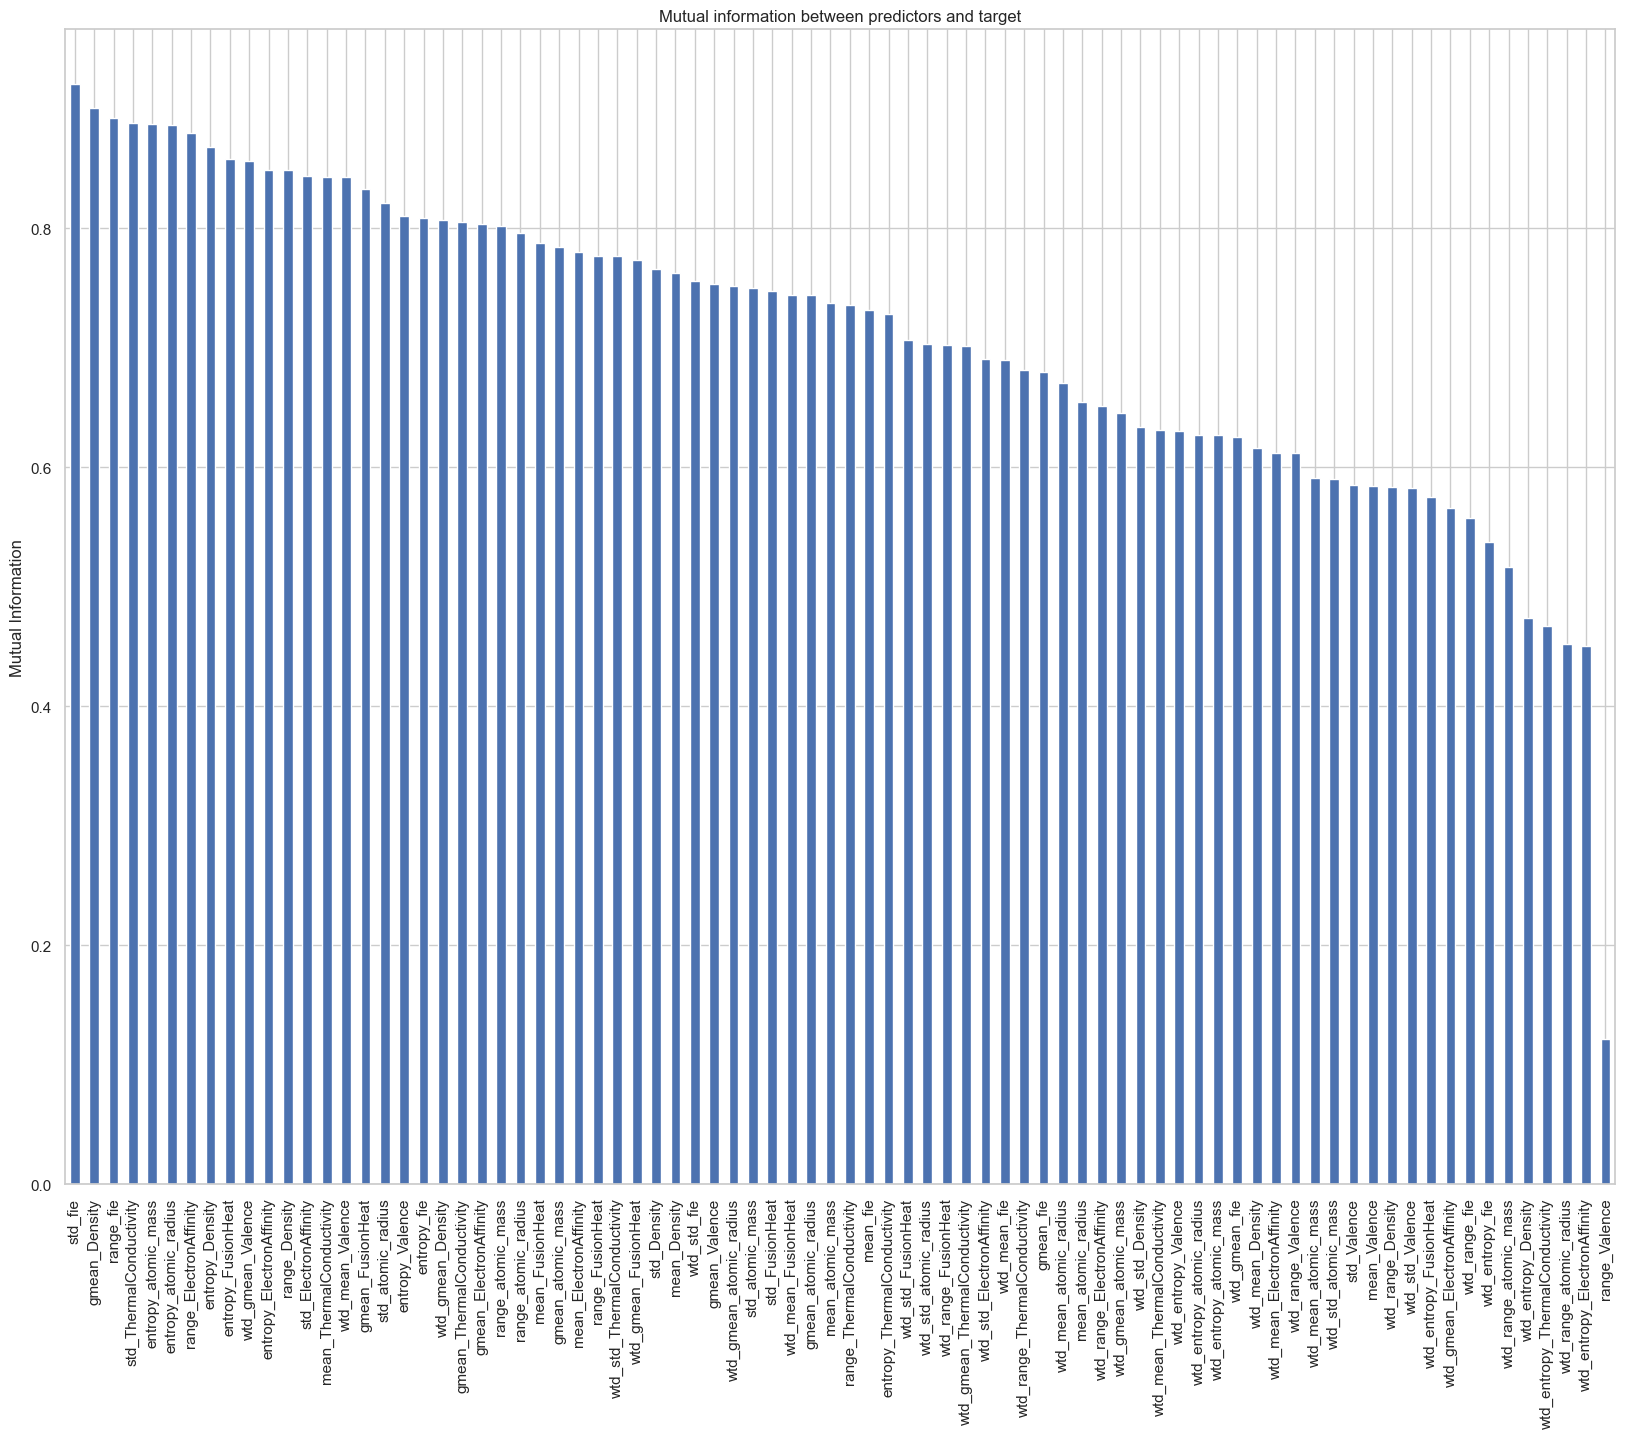

In [47]:
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 15))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [48]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=70).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'entropy_fie', 'range_fie',
       'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat',
       'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat',
       'range_FusionHeat', 'wtd_range_FusionHeat', 'std_FusionHeat'

In [49]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [50]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,entropy_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence
8585,120.375212,90.122861,87.160899,1.588258,192.981000,71.797826,761.050000,760.002500,725.722910,1.740040,...,9.305928,0.707297,399.97342,66.662237,142.886017,143.722576,3.058333,2.798166,2.796327,1.721089
14137,55.968640,33.231395,12.737689,0.645957,120.894752,54.586871,652.266667,1055.693651,586.791335,0.991442,...,137.014246,0.968823,104.00000,132.761905,49.026070,12.998362,3.857143,1.587401,3.744471,0.867563
3287,87.965750,68.929369,65.953792,1.740893,191.200600,57.176539,770.614286,749.871429,739.396277,1.901217,...,27.854423,1.310386,399.97342,114.281917,133.290719,166.954038,2.300000,2.339862,2.228493,1.905420
6798,97.247133,70.691312,36.916701,1.534688,192.981000,68.900818,746.733333,1006.727867,711.078757,1.737574,...,0.931874,0.960827,399.97342,53.319157,146.826147,137.044662,2.430000,2.492883,2.282982,1.717076
7157,89.050983,73.153650,35.224165,1.653875,124.908250,42.834555,708.600000,999.182362,666.244247,1.723221,...,1.152389,0.684593,399.97342,93.225905,143.248747,166.831911,2.108780,2.401874,2.082550,1.748971


In [51]:
X_train_m.shape, X_test_m.shape

((16954, 56), (4239, 56))

# Scaling

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_m)

X_test_sc=min_max_scaler.fit_transform(X_test_m)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

In [54]:
y_train_sc

array([[0.15459363],
       [0.06270164],
       [0.12162062],
       ...,
       [0.32432356],
       [0.08108004],
       [0.00107995]])

# Baseline model

In [15]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor

In [17]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [18]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0789
Test MAE (LR_baseline) : 0.0821 

Train R^2 (LR_baseline): 0.6879
Test R^2 (LR_baseline) : 0.6648 



# Cross-Validation

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [20]:



list_of_models = [
    RandomForestRegressor(),
    XGBRegressor(),
    KNeighborsRegressor(),
    LGBMRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'neg_mean_squared_error', 'neg_mean_absolute_error'])

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_sc,
        y=y_train_sc,
        scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'],
        cv=30,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = [
        np.mean(cv_result['fit_time']),
        np.mean(cv_result['score_time']),
        np.mean(cv_result['test_neg_mean_squared_error']) * -1,
        np.mean(cv_result['test_neg_mean_absolute_error'])  # Removed the negative sign here
    ]

print(cv_results)

                             fit_time  score_time  neg_mean_squared_error  \
RandomForestRegressor      192.601037    0.030567                0.002641   
XGBRegressor                14.475378    0.004167                0.002874   
KNeighborsRegressor          0.011026    0.158501                0.003645   
LGBMRegressor                1.309035    0.005633                0.003199   
SVR                          9.463466    0.290138                0.007106   
DecisionTreeRegressor        2.452633    0.001734                0.004163   
GradientBoostingRegressor   47.455716    0.002567                0.004973   

                           neg_mean_absolute_error  
RandomForestRegressor                    -0.028385  
XGBRegressor                             -0.031696  
KNeighborsRegressor                      -0.033624  
LGBMRegressor                            -0.035837  
SVR                                      -0.064616  
DecisionTreeRegressor                    -0.033337  
GradientBoos

# RandomForestRegressor

In [57]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred = model.predict(X_test_sc)

# Evaluate the model's performance
mse_rf = mse(y_test_sc, y_pred)
mae_rf = mae(y_test_sc, y_pred)
r2_rf= r2(y_test_sc, y_pred)
mape_rf = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)
print("mape:", mape_rf)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.006778299577580886
Mean Absolute Error (MAE): 0.05532369225367662
R-squared (R2): 0.8050032136084763
mape: 4.92550433402396


# XGBRegressor

In [58]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred = model.predict(X_test_sc)

# Evaluate the model's performance
mse_xg = mse(y_test_sc, y_pred)
mae_xg = mae(y_test_sc, y_pred)
r2_xg = r2(y_test_sc, y_pred)
mape_xg = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse_xg)
print("Mean Absolute Error (MAE):", mae_xg)
print("R-squared (R2):", r2_xg)
print("mape:", mape_xg)

Mean Squared Error (MSE): 0.00585489895327434
Mean Absolute Error (MAE): 0.0514276349810379
R-squared (R2): 0.8315674207862247
mape: 10.148780538901573


# TUNING

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor


model = XGBRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

#  Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_sc, y_train_sc)


best_params_grid = grid_result.best_params_
best_score_grid = grid_result.best_score_

# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_result = random_search.fit(X_train_sc, y_train_sc)


best_params_random = random_result.best_params_
best_score_random = random_result.best_score_

print("Best Hyperparameters (Grid Search):", best_params_grid)
print("Best MSE Score (Grid Search):", best_score_grid)

print("Best Hyperparameters (Random Search):", best_params_random)
print("Best MSE Score (Random Search):", best_score_random)

Best Hyperparameters (Grid Search): {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 1.0}
Best MSE Score (Grid Search): -0.0028436448949898576
Best Hyperparameters (Random Search): {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best MSE Score (Random Search): -0.0030284613819060455


Best Hyperparameters (Grid Search):

In [62]:
best_model_GS = XGBRegressor(
    n_estimators=150,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=3,
    subsample=1.0,
    random_state=42)


best_model_GS.fit(X_train_sc, y_train_sc)


y_pred = best_model_GS.predict(X_test_sc)

# Evaluate the model's performance
mse_gs = mse(y_test_sc, y_pred)
mae_gs = mae(y_test_sc, y_pred)
r2_gs = r2(y_test_sc, y_pred)
mape_gs = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse_gs)
print("Mean Absolute Error (MAE):", mae_gs)
print("R-squared (R2):", r2_gs)
print("mape:", mape_gs)

Mean Squared Error (MSE): 0.0058420856108109065
Mean Absolute Error (MAE): 0.05118505396019883
R-squared (R2): 0.8319360324969799
mape: 3.8718858983046904


In [63]:
best_model_RS = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)


best_model_RS.fit(X_train_sc, y_train_sc)


y_pred = best_model_RS.predict(X_test_sc)

# Evaluate the model's performance
mse_rs = mse(y_test_sc, y_pred)
mae_rs = mae(y_test_sc, y_pred)
r2_rs = r2(y_test_sc, y_pred)
mape_rs = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):", mse_rs)
print("Mean Absolute Error (MAE):", mae_rs)
print("R-squared (R2):", r2_rs)
print("mape:", mape_rs)

Mean Squared Error (MSE): 0.005796112772645871
Mean Absolute Error (MAE): 0.05185824642947819
R-squared (R2): 0.833258570045059
mape: 8.904831255576438


 RandomForest Model

In [67]:
import warnings
from sklearn.exceptions import DataConversionWarning

In [68]:
# Ignore DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)


# RandomForest Model
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train_sc, y_train_sc)

best_params_grid = grid_result.best_params_
best_score_grid = grid_result.best_score_

# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_result = random_search.fit(X_train_sc, y_train_sc)
# Reset warnings to default behavior
warnings.filterwarnings("default", category=DataConversionWarning)


best_params_random = random_result.best_params_
best_score_random = random_result.best_score_

print("Best Hyperparameters Random Forest model (Grid Search):", best_params_grid)
print("Best MSE Score Random Forest model (Grid Search):", best_score_grid)

print("Best Hyperparameters Random Forest model(Random Search):", best_params_random)
print("Best MSE Score Random Forest model (Random Search):", best_score_random)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py", line 637, in _validate_pa

Best Hyperparameters Random Forest model (Grid Search): {'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best MSE Score Random Forest model (Grid Search): -0.005752235459112665
Best Hyperparameters Random Forest model(Random Search): {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'bootstrap': True}
Best MSE Score Random Forest model (Random Search): -0.0058273649671001975


Best Hyperparameters Random Forest model (Grid Search)

In [79]:
RF_best_model_GS = RandomForestRegressor(
    bootstrap =False,
    max_features ='sqrt',
    max_depth=7,
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators =150,
    random_state=42)


RF_best_model_GS.fit(X_train_sc, y_train_sc)


y_pred =RF_best_model_GS.predict(X_test_sc)

# Evaluate the model's performance
rf_mse_gs = mse(y_test_sc, y_pred)
rf_mae_gs = mae(y_test_sc, y_pred)
rf_r2_gs = r2(y_test_sc, y_pred)
rf_mape_gs = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):",rf_mse_gs)
print("Mean Absolute Error (MAE):",rf_mae_gs)
print("R-squared (R2):", rf_r2_gs)
print("mape:", rf_mape_gs)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.007334822028073966
Mean Absolute Error (MAE): 0.06064758933059245
R-squared (R2): 0.7889932854312363
mape: 13.62474141953232


Best Hyperparameters Random Forest model(Random Search)

In [80]:
RF_best_model_RS = RandomForestRegressor(
    bootstrap =True,
    max_features ='sqrt',
    max_depth=7,
    min_samples_leaf = 1,
    min_samples_split = 2,
    n_estimators =150,
    random_state=42)


RF_best_model_RS.fit(X_train_sc, y_train_sc)


y_pred =RF_best_model_RS.predict(X_test_sc)

# Evaluate the model's performance
rf_mse_rs = mse(y_test_sc, y_pred)
rf_mae_rs = mae(y_test_sc, y_pred)
rf_r2_rs = r2(y_test_sc, y_pred)
rf_mape_rs = mape(y_test_sc, y_pred)

print("Mean Squared Error (MSE):",rf_mse_rs)
print("Mean Absolute Error (MAE):",rf_mae_rs)
print("R-squared (R2):", rf_r2_rs)
print("mape:", rf_mape_rs)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 0.007559426209406488
Mean Absolute Error (MAE): 0.06187155455301319
R-squared (R2): 0.7825319166072913
mape: 14.70214098865112


In [90]:
!pip install numpy==1.19.5

     ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/13.3 MB 3.3 MB/s eta 0:00:04
      --------------------------------------- 0.3/13.3 MB 3.4 MB/s eta 0:00:04
     - -------------------------------------- 0.4/13.3 MB 3.7 MB/s eta 0:00:04
     - -------------------------------------- 0.5/13.3 MB 3.1 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/13.3 MB 3.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/13.3 MB 3.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/13.3 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/13.3 MB 3.3 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/13.3 MB 3.5 MB/s eta 0:00:04
     ---- ----------------------------------- 1.6/13.3 MB 3.6 MB/s eta 0:00:04
     ----- ---------------------------------- 1.8/13.3 MB 3.6 MB/s eta 0:00:04
     ------ --------------------------------- 2.0/13.3 MB 3

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Misi\\anaconda3\\envs\\superconductivity\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [92]:

from skopt.space import Real, Integer
from skopt import BayesSearchCV
from xgboost import XGBRegressor

In [93]:

param_space = {
    'eta': Real(0.0001, 1.0, 'log-uniform'),
    'gamma': Real(0.0001, 1.0, 'log-uniform'),
    'max_depth': Integer(2, 20),
    'min_child_weight': Integer(1, 20),
    'max_delta_step': Real(0.0001, 10.0, 'log-uniform'),
    'lambda': Real(0.0001, 100.0, 'log-uniform'),
    'alpha': Real(0.0001, 100.0, 'log-uniform'),
    'tree_method': (['hist', 'exact', 'approx', 'gpu_hist']),
    'learning_rate': Real(0.0001, 1.0, 'log-uniform'),
    'max_leaves': Integer(2, 500)
}

model = XGBRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MSE score:", -search.best_score_)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [124]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np


scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform(y_pred.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0            38.0    28.770880
1            13.4    15.600076
2            69.5    73.102150
3            92.8    69.957962
4            68.0    80.786034
...           ...          ...
4234        101.1    93.267891
4235         87.5    60.198456
4236          5.1     5.370173
4237         36.0    19.367340
4238         24.6    17.048914

[4239 rows x 2 columns]


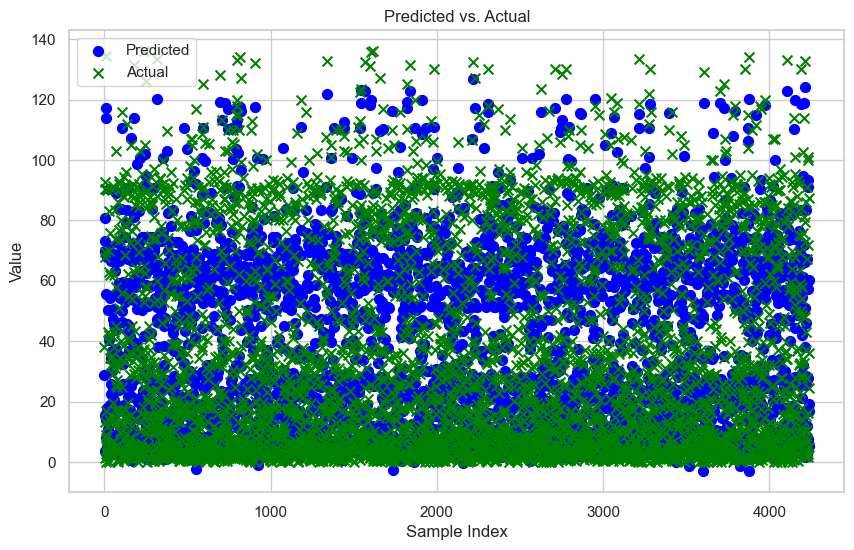

In [129]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x_indexes = range(len(result_df))


point_size = 50


plt.scatter(x_indexes, result_df['y_pred_unsc'], label='Predicted', color='blue', s=point_size, marker='o')


plt.scatter(x_indexes, result_df['y_test_unsc'], label='Actual', color='green', s=point_size, marker='x')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predicted vs. Actual')
plt.legend()

plt.show()